*JSC270, Winter 2020 - Prof. Chevalier*

# <center>  Assignment 2 - Yelp  </center>

 <center>  Yun Shen  </center>

***

<img src="files/yelp_logo.png">

## Introduction

Yelp is a business directory service and crowd-sourced review forum, and a public company of the same name that is headquartered in San Francisco, California. Many users post their reviews on various businesses on Yelp that help the community get a better idea of the performance of the businesses, and thus enable them to make better decisions.

According to the Dataset License, we can't use the data in connection with any commercial purpose or use the data for any purpose that's against Yelp. We can't also transform the usage of the data to other people.

The business.json file contains business data including location data, attributes, and categories. The review.json file contains full review text data including the user_id that wrote the review and the business_id the review is written for.

In [1]:
import pandas as pd
import geopandas as gpd

import json  
from pandas.io.json import json_normalize  
import matplotlib.pyplot as plt
import seaborn as sns
from json_to_csv_converter1 import read_and_write_file, get_superset_of_column_names_from_file, get_column_names, \
get_nested_value, get_row
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from nltk.corpus import stopwords
import numpy as np

## All Businesses

Since all the data are saved in json format, I used the json to csv converter that is given as an example in the Yelp Data Challenge documentation page https://github.com/Yelp/dataset-examples. 

In [4]:
json = 'yelp_dataset/business.json'
csv = 'business.csv'
column_names = get_superset_of_column_names_from_file('yelp_dataset/business.json')
read_and_write_file(json, csv, column_names)

KeyboardInterrupt: 

In [2]:
business = pd.read_csv("business.csv")
business

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (2,26,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


attributes.Smoking attributes.DriveThru  \
0                     NaN                  NaN   
1                     NaN                  NaN   
2                     NaN                  NaN   
3                     NaN                  NaN   
4                     NaN                  NaN   
...                   ...                  ...   
192604                NaN                  NaN   
192605                NaN                  NaN   
192606                NaN                  NaN   
192607                NaN                  NaN   
192608                NaN                  NaN   

       attributes.RestaurantsCounterService attributes.RestaurantsTakeOut  \
0                                       NaN                           NaN   
1                                       NaN                          True   
2                                       NaN                          True   
3                                       NaN                           NaN   
4                                       NaN                           NaN   
...                                     ...                           ...   
192604                                  NaN                           NaN   
192605                                  NaN                           NaN   
192606                                  NaN                           NaN   
192607                                  NaN                           NaN   
192608                                  NaN                           NaN   

       attributes.WiFi attributes.RestaurantsAttire attributes.GoodForKids  \
0                  NaN                          NaN                  False   
1                u'no'                    u'casual'                   True   
2                u'no'                     'casual'                   True   
3                  NaN                          NaN                    NaN   
4                  NaN                          NaN                    NaN   
...                ...                          ...                    ...   
192604             NaN                          NaN                    NaN   
192605             NaN                          NaN                    NaN   
192606             NaN                          NaN                    NaN   
192607             NaN                          NaN                    NaN   
192608             NaN                          NaN                    NaN   

       attributes.Music attributes.CoatCheck hours.Saturday  ...  \
0                   NaN                  NaN            NaN  ...   
1                   NaN                  NaN        9:0-1:0  ...   
2                   NaN                  NaN     17:30-22:0  ...   
3                   NaN                  NaN            NaN  ...   
4                   NaN                  NaN       7:0-23:0  ...   
...                 ...                  ...            ...  ...   
192604              NaN                  NaN        0:0-0:0  ...   
192605              NaN                  NaN            NaN  ...   
192606              NaN                  NaN            NaN  ...   
192607              NaN                  NaN       7:0-15:0  ...   
192608              NaN                  NaN       10:0-0:0  ...   

                                      attributes.Ambience  postal_code  \
0                                                     NaN        85016   
1       {'romantic': False, 'intimate': False, 'classy...      L5R 3E7   
2       {'romantic': False, 'intimate': False, 'touris...        28210   
3                                                     NaN        85338   
4                                                     NaN        28217   
...                                                   ...          ...   
192604                                                NaN        89032   
192605                                                NaN      L3Y 6Y9   
192606                                                NaN    

### 1. What cities does this dataset encompass?

To study the pattern of the cities this dataset encompass, I first want to get an idea about how the cities locate in this dataset. As mentioned in the introduction of the challenge, the dataset contains businesses and review of 10 metropolitan areas. Here I extracted all the unique state names of all business.

In [3]:
business['state'].unique()

array(['AZ', 'ON', 'NC', 'AB', 'NV', 'OH', 'PA', 'QC', 'WI', 'IL', 'NY',
       'SC', 'TX', 'UT', 'NM', 'FL', 'CA', 'VA', 'BAS', 'NE', 'AK', 'XGM',
       'WA', 'XWY', 'CON', 'BC', 'GA', 'VT', 'CT', 'AL', 'DUR', 'TN',
       'NJ', 'AR', 'XGL', 'DOW'], dtype=object)

I notice that the 2-letter area codes represent the states of the US and the provinces of Canada. However, the 3-letter area codes seem very unfamiliar to me. Thus, I extract all the business with the state attribute from the 3-letter area codes above and take a closer look of those businesses. There are only 11 businesses from those regions, and by searching by the names of the businesses on Yelp, I conclude that they are from the UK. However, since there are only 11 businesses out of 192,609 businesses having the uncommon state attributes, I decide to remove them from the dataset for further studying.

In [4]:
business[(business['state'] == 'BAS') | (business['state'] == 'XGM') | (business['state'] == 'XWY') |
        (business['state'] == 'CON') | (business['state'] == 'DUR') |(business['state'] == 'XGL') |
        (business['state'] == 'DOW')]

attributes.Smoking attributes.DriveThru  \
27744                 NaN                  NaN   
33265                 NaN                  NaN   
35255                 NaN                  NaN   
39022                 NaN                  NaN   
54920                 NaN                  NaN   
58669                 NaN                  NaN   
127476                NaN                  NaN   
133170                NaN                  NaN   
144601                NaN                  NaN   
179148                NaN                  NaN   
188285                NaN                  NaN   

       attributes.RestaurantsCounterService attributes.RestaurantsTakeOut  \
27744                                   NaN                           NaN   
33265                                   NaN                          True   
35255                                   NaN                           NaN   
39022                                   NaN                           NaN   
54920                                   NaN                          True   
58669                                   NaN                          True   
127476                                  NaN                           NaN   
133170                                  NaN                          True   
144601                                  NaN                           NaN   
179148                                  NaN                           NaN   
188285                                  NaN                           NaN   

       attributes.WiFi attributes.RestaurantsAttire attributes.GoodForKids  \
27744              NaN                          NaN                    NaN   
33265          u'free'                     'casual'                    NaN   
35255              NaN                          NaN                    NaN   
39022              NaN                          NaN                    NaN   
54920             'no'                    u'casual'                    NaN   
58669              NaN                          NaN                    NaN   
127476             NaN                          NaN                    NaN   
133170            'no'                    u'dressy'                    NaN   
144601             NaN                          NaN                    NaN   
179148             NaN                          NaN                    NaN   
188285             NaN                          NaN                    NaN   

       attributes.Music attributes.CoatCheck hours.Saturday  ...  \
27744               NaN                  NaN            NaN  ...   
33265               NaN                  NaN      8:30-19:0  ...   
35255               NaN                  NaN        0:0-0:0  ...   
39022               NaN                  NaN            NaN  ...   
54920               NaN                  NaN            NaN  ...   
58669               NaN                  NaN            NaN  ...   
127476              NaN                  NaN            NaN  ...   
133170              NaN                  NaN            NaN  ...   
144601              NaN                  NaN            NaN  ...   
179148              NaN                  NaN      9:0-17:30  ...   
188285              NaN                  NaN            NaN  ...   

                                      attributes.Ambience  postal_code  \
27744                                                 NaN      BA1 1NG   
33265                                                 NaN      M33 7XW   
35255                                                 NaN      BL8 4DR   
39022                                                 NaN      M12 5GH   
54920                                                 NaN      LS6 4EP   
58669                                                 NaN     TR12 6SX   
127476                                                NaN      L4J 3M8   
133170  {'romantic': False, 'intimate': False, 'classy...     LS27 8EB   
144601                                                NaN    

In [5]:
business = business[~(business['state'] == 'BAS') & ~(business['state'] == 'XGM') & ~(business['state'] == 'XWY') &
           ~(business['state'] == 'CON') & ~(business['state'] == 'DUR') & ~(business['state'] == 'XGL') &
           ~(business['state'] == 'DOW')]


Re-examining all the states and provinces in this dataset, I notice that there are 18 of the states having less than 25 businesses. Thus, I decide to remove them when studying about the state and city composition in the dataset. I create a new variable called state_count to record the number of businesses in each state and removes all the states with less than 22 business.

In [6]:
business['state_count'] = business.groupby('state')['state'].transform('count')
state_count = business[['state','state_count']].drop_duplicates(subset=['state'])
state_count

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


state  state_count
0         AZ        56686
1         ON        33412
2         NC        14720
6         AB         8012
7         NV        36312
9         OH        14697
23        PA        11216
82        QC         9219
87        WI         5154
289       IL         1932
595       NY           22
817       SC         1162
11143     TX            6
16490     UT            1
17473     NM            1
17880     FL            4
19062     CA           19
26155     VA            2
28523     NE            2
32107     AK            2
46131     WA            3
62668     BC            1
81953     GA            2
83767     VT            2
85200     CT            3
121593    AL            3
136357    TN            1
164311    NJ            1
164784    AR            1

In [7]:
state_count = state_count[state_count['state_count']>22]
state_count

state  state_count
0      AZ        56686
1      ON        33412
2      NC        14720
6      AB         8012
7      NV        36312
9      OH        14697
23     PA        11216
82     QC         9219
87     WI         5154
289    IL         1932
817    SC         1162

In [8]:
import plotly.graph_objects as go

# Load data frame and tidy it.
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
fig = go.Figure(data=go.Choropleth(
    locations=state_count['state'], # Spatial coordinates
    z = state_count['state_count'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Number of Business",
))
fig.update_layout(
    title_text = 'Businesses Located in the US by States',
    geo_scope='usa', # limite map scope to USA
)
fig.show()


From the map above, I am only going to study the number of businesses in each state in the US. Arizona has the most number of businesses in the dataset, with more than 56,000 businesses. Nevada has the second most number of businesses, more than 36,000. Since these two states are geographically located next to each other, we may consider them as a mega metropilitian area. I also notice that there are three more pairs of states in this dataset. They are Wisconsin and Illinois, Ohio and Pennsylvania, North Carolina and South Carolina.

Due to the missing political boundary information in Plotly library, I do not plot the number of businesses as bubble map for provinces in Canada. By looking at the state_count dataframe. There are three Canadian provinces, and they are Ontario, Quebec and Alberta. Ontario has around 33,000 businesses, Quebec has around 9,000 businesses and Alberta has around 8,000 business. If they are plotted in the map, Ontario should be shaded in red, while Quebec and Alberta should be shaded in light orange. 

Overall, in this dataset after removing the outliers, there are five states and provinces located around the Great Lakes area. There are two states located in the southeast corner of the US and two states located in the southwest corner.

Now let's look at how the cities located in the dataset. I create a new variable called city_count to record the number of businesses in each city and create a new dataframe city_count that only stores the cities and the number of businesses in those cities. I am only going to study the cities with top 20 number of businesses, so I sort the dataframe by city_count and extract the top 20 cities.

In [9]:
business['city_count'] = business.groupby('city')['city'].transform('count')
city_count = business[['city','city_count','state']].drop_duplicates(subset=['city'])
city_count = city_count.sort_values(by=['city_count'], ascending=False)
city_count = city_count.head(20).reset_index(drop=True)
city_count['city_count'] = city_count['city_count'].astype(int)
city_count

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



city  city_count state
0         Las Vegas       29370    NV
1           Toronto       18906    ON
2           Phoenix       18766    AZ
3         Charlotte        9509    NC
4        Scottsdale        8837    AZ
5           Calgary        7736    AB
6        Pittsburgh        7017    PA
7          Montréal        6449    QC
8              Mesa        6080    AZ
9         Henderson        4892    NV
10            Tempe        4550    AZ
11         Chandler        4309    AZ
12        Cleveland        3605    OH
13         Glendale        3543    AZ
14          Madison        3494    WI
15          Gilbert        3462    AZ
16      Mississauga        3112    ON
17           Peoria        1919    AZ
18          Markham        1766    ON
19  North Las Vegas        1548    NV

I decide to plot a bubble map of the number of businesses of the top 20 cities to visualize how these cities located and the number of their businesses to find out if there is any relationship in between. First, I use the OpenCageGeocode API to load the longitude and latitude of each city into the city_count dataframe.

In [10]:
from opencage.geocoder import OpenCageGeocode
key = '5e2e7dae71c64a8c8c882ff05245424f'  # get api key from:  https://opencagedata.com
geocoder = OpenCageGeocode(key)
list_lat = []   # create empty lists

list_long = []

for index, row in city_count.iterrows(): # iterate over rows in dataframe
    City = row['city']
    State = row['state']       
    query = str(City)+','+str(State)

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(long)
    
city_count['latitude'] = list_lat
city_count['longtitude'] = list_long

In [11]:
city_count

city  city_count state   latitude  longtitude
0         Las Vegas       29370    NV  36.167256 -115.148516
1           Toronto       18906    ON  43.653963  -79.387207
2           Phoenix       18766    AZ  33.448437 -112.074142
3         Charlotte        9509    NC  35.227199  -80.843083
4        Scottsdale        8837    AZ  33.494219 -111.926018
5           Calgary        7736    AB  51.053423 -114.062589
6        Pittsburgh        7017    PA  40.441694  -79.990086
7          Montréal        6449    QC  45.497216  -73.610364
8              Mesa        6080    AZ  33.415112 -111.831477
9         Henderson        4892    NV  36.030113 -114.982619
10            Tempe        4550    AZ  33.425506 -111.940012
11         Chandler        4309    AZ  33.306222 -111.841332
12        Cleveland        3605    OH  41.505161  -81.693445
13         Glendale        3543    AZ  33.538686 -112.185994
14          Madison        3494    WI  43.074761  -89.383761
15          Gilbert        3462    AZ  33.352763 -111.789037
16      Mississauga        3112    ON  43.590338  -79.645729
17           Peoria        1919    AZ  33.580612 -112.237294
18          Markham        1766    ON  43.854336  -79.326782
19  North Las Vegas        1548    NV  36.200584 -115.121584

For the bubble map, I classify the cities into four categories by their number of businesses. They are 1000-2000, 2000-5000, 5000-10000 and 10000-30000. I use different colors to represent different sizes to make ease for the readers.

In [12]:
def get_index(dataframe, lim):
    index_list=[]
    for index, row in dataframe.iterrows(): # iterate over rows in dataframe
        if row['city_count'] > lim[0] and row['city_count'] < lim[1]:
            index_list.append(index)
    return [min(index_list), max(index_list)+1]

In [103]:
limits = [(1000,2000),(2000,5000),(5000,10000),(10000,30000)]
colors = ["royalblue","crimson","lightseagreen","orange"]

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    curr = get_index(city_count, lim)
    df_sub = city_count[curr[0]:curr[1]]
    fig.add_trace(go.Scattergeo(
        lon = df_sub['longtitude'],
        lat = df_sub['latitude'],
        text = df_sub['city'],
        marker = dict(
            size = df_sub['city_count']/50,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'    
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))


fig.update_layout(
        title_text = 'Top 20 Cities with the most number of Businesses<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'north america',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

The top 20 cities are clustered similarly to the states and provinces. Las Vegas has the most businesses in the US, which is around 30,000, and Toronto has the most businesses in Canada, which is around 19,000. 

There are many bubbles overlapping each other, which implies one of the limitations of this map. The cities listed in the dataset may not always be a large city, and some satellite cities are often considered as their main city. We need to think about if we want to consider them as one or separately.

### 2. What are the most frequent business categories overall?

<img src="yelp.png">

First, I apply the function value_count by categories to dataframe business to get an overview about the most frequent business categories.

In [14]:
business['categories'].value_counts().head(30)

Restaurants, Pizza                           1042
Nail Salons, Beauty & Spas                   1031
Pizza, Restaurants                            993
Beauty & Spas, Nail Salons                    947
Food, Coffee & Tea                            888
Mexican, Restaurants                          885
Coffee & Tea, Food                            865
Restaurants, Mexican                          853
Chinese, Restaurants                          839
Hair Salons, Beauty & Spas                    831
Beauty & Spas, Hair Salons                    819
Restaurants, Chinese                          789
Automotive, Auto Repair                       585
Auto Repair, Automotive                       534
Food, Grocery                                 492
Grocery, Food                                 491
Restaurants, Italian                          474
Italian, Restaurants                          446
Banks & Credit Unions, Financial Services     439
Financial Services, Banks & Credit Unions     401


From the count table above, we notice that out of these most popular categories, some of them are counted twice due to the order of the composition of the categories. Thus, it's reasonable to treat them as the same categories and use consistent names of each category. Since we are only investigating the most frequent business categories overall and the dataset is too large, consisting of 93386 categories, I am only going to extract the top 50 categories and rename them.

In [15]:
categories_50 = business['categories'].value_counts().head(50).to_frame().index.tolist()
def get_correct_categories(categories):
    correct_categories = []
    for cat in categories:
        if len(correct_categories) == 0:
            correct_categories.append(cat)
        if cat not in correct_categories:
            max_score = 0
            for correct in correct_categories:
                ratio = fuzz.token_sort_ratio(correct, cat)
                if ratio > max_score:
                    max_score = ratio
            if max_score < 95:
                correct_categories.append(cat)
    return correct_categories      

correct_categories = get_correct_categories(categories_50)
correct_categories

['Restaurants, Pizza',
 'Nail Salons, Beauty & Spas',
 'Food, Coffee & Tea',
 'Mexican, Restaurants',
 'Chinese, Restaurants',
 'Hair Salons, Beauty & Spas',
 'Automotive, Auto Repair',
 'Food, Grocery',
 'Restaurants, Italian',
 'Banks & Credit Unions, Financial Services',
 'Ice Cream & Frozen Yogurt, Food',
 'Beauty & Spas, Barbers',
 'Real Estate, Apartments, Home Services',
 'Pets, Veterinarians',
 'Bakeries, Food',
 'Car Rental, Hotels & Travel',
 'American (Traditional), Restaurants',
 'Heating & Air Conditioning/HVAC, Home Services',
 'Vietnamese, Restaurants',
 'Restaurants, Thai',
 'Hotels & Travel, Event Planning & Services, Hotels',
 'Car Dealers, Automotive',
 'Restaurants',
 'American (New), Restaurants']

In [51]:
def fuzz_m(col, cat_list, score_t):
    new_name, score = process.extractOne(col, cat_list, scorer=score_t)
    if score<95:
        return col
    else:
        return new_name
business['categories'] = business['categories'].astype(str)
business['new_cat'] = business['categories'].apply(fuzz_m, cat_list=correct_categories, \
                                                               score_t=fuzz.token_sort_ratio)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



I wrote a function to gather all the unique category names. I also wrote a function to replace the categories with the correct ones and saved them as new_cat. By extracting the top 20 categories and recording the number of each category, I created a new dataframe called cat_count that has the information about the names, the counts and whether the category is food related or not.

In [20]:
business['cat_count'] = business.groupby('new_cat')['new_cat'].transform('count')
cat_count = business[['new_cat','cat_count']].drop_duplicates(subset=['new_cat'])
cat_count = cat_count.sort_values(by=['cat_count'], ascending=False)
cat_count = cat_count.head(20).reset_index(drop=True)
cat_count['Food Related'] = ['yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', \
                            'no', 'no', 'yes', 'no', 'yes', 'no', 'yes']
cat_count['Color'] = np.where(cat_count['Food Related'] == 'yes', 'lightseagreen', 
                            np.where(cat_count['Food Related'] == 'no', 'orange', None))
cat_count

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



new_cat  cat_count Food Related  \
0                                  Restaurants, Pizza       2035          yes   
1              Real Estate, Apartments, Home Services       1978           no   
2                          Nail Salons, Beauty & Spas       1978           no   
3                                  Food, Coffee & Tea       1753          yes   
4                                Mexican, Restaurants       1738          yes   
5                          Hair Salons, Beauty & Spas       1650           no   
6                                Chinese, Restaurants       1628          yes   
7   Hotels & Travel, Event Planning & Services, Ho...       1426           no   
8                             Automotive, Auto Repair       1119           no   
9                                       Food, Grocery        983          yes   
10                               Restaurants, Italian        920          yes   
11          Banks & Credit Unions, Financial Services        840           no   
12                    Ice Cream & Frozen Yogurt, Food        780          yes   
13                             Beauty & Spas, Barbers        745           no   
14                                Pets, Veterinarians        589           no   
15                                     Bakeries, Food        567          yes   
16                        Car Rental, Hotels & Travel        566           no   
17                American (Traditional), Restaurants        554          yes   
18     Heating & Air Conditioning/HVAC, Home Services        542           no   
19                            Vietnamese, Restaurants        536          yes   

            Color  
0   lightseagreen  
1          orange  
2          orange  
3   lightseagreen  
4   lightseagreen  
5          orange  
6   lightseagreen  
7          orange  
8          orange  
9   lightseagreen  
10  lightseagreen  
11         orange  
12  lightseagreen  
13         orange  
14         orange  
15  lightseagreen  
16         orange  
17  lightseagreen  
18         orange  
19  lightseagreen

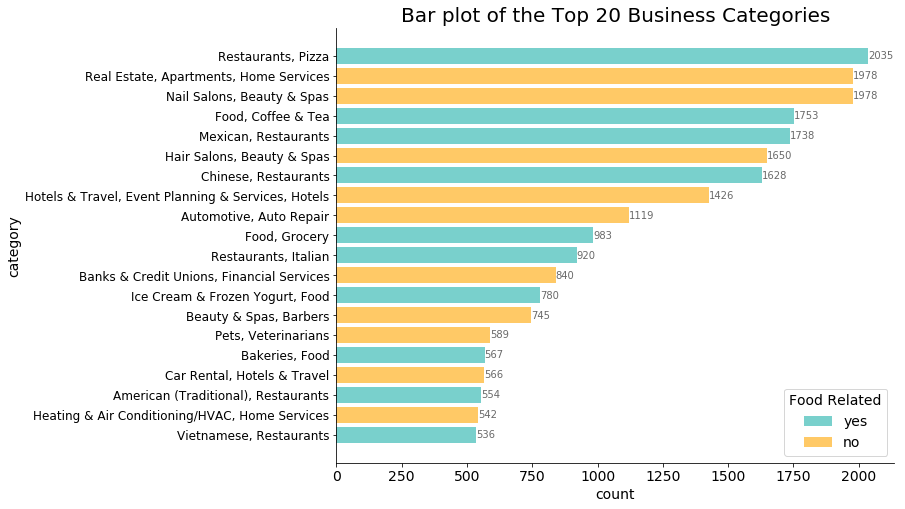

In [21]:
color = cat_count['Color'].to_list()
y = cat_count['new_cat'].to_list()
x = cat_count['cat_count'].to_list()
labels = cat_count['Food Related'].to_list()
fig, ax = plt.subplots(figsize=(10, 8))
for j in range(len(cat_count)):
    ax.barh(y[j], x[j], align='center', color=color[j], alpha=0.6, label=labels[j])
ax.invert_yaxis()
plt.xlabel('count', fontsize=14)
plt.ylabel('category', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
leg = ax.legend (['yes', 'no'], title='Food Related', fontsize=14)
leg.set_title('Food Related',prop={'size':14})
plt.title('Bar plot of the Top 20 Business Categories', fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.55, \
            str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')


plt.show()


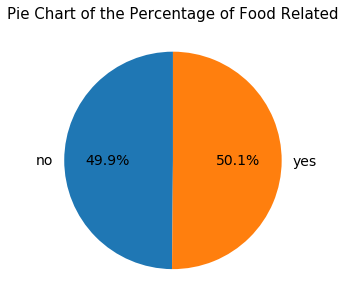

In [22]:
food = cat_count.groupby(by=['Food Related']).sum()
sizes = food['cat_count'].to_list()
labels =  food.index.values.tolist()

fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Pie Chart of the Percentage of Food Related', fontsize=15)
plt.show()


As shown in the bar chart, the most popular business category is pizza restaurant. The second most popular one is real estate and the third most popular one is nail salon. All of the three have around 2000 businesses in the dataset. Out of the top 20 business categories, half of them are food related. 

As shown in the pie chart, the percentages of food-related businesses and non-food-related businesses are almost the same. This is surprising because Yelp was frequently used for food reviews. When you go onto the yelp main page, the backgroud image is a restaurant, and the category icons indicated on the main page are all food-related. Thus, I wonder if this will change region by region and I will further investigate it.

### 3. What types of establishments tend to have bike parking?

The original dataset business has a column called attributes.BikeParking. This column indicates whether or not the business has bike parking. By only selecting the rows where attributes.BikeParking is True, I create a new dataframe called bike_parking that only consists of the businesses with bike parking.

In [39]:
bike_parking = business[business['attributes.BikeParking'] == 'True']
top_15_businesses = bike_parking['name'].value_counts().head(15).to_dict()
bike_parking['name'].value_counts().head(15)


Starbucks                 831
McDonald's                414
Walgreens                 226
Subway                    225
Tim Hortons               196
CVS Pharmacy              162
Taco Bell                 143
Great Clips               137
Chipotle Mexican Grill    136
Circle K                  125
Dunkin' Donuts            119
Burger King               117
Panera Bread              111
Wendy's                   109
7-Eleven                  102
Name: name, dtype: int64

In [24]:
bike_parking['new_cat'].value_counts().head(15)

Food, Coffee & Tea                     1179
Nail Salons, Beauty & Spas              991
Mexican, Restaurants                    829
Hair Salons, Beauty & Spas              734
Restaurants, Pizza                      623
Chinese, Restaurants                    614
Food, Grocery                           607
Beauty & Spas, Barbers                  470
Ice Cream & Frozen Yogurt, Food         404
Restaurants, Italian                    310
Bakeries, Food                          257
Vietnamese, Restaurants                 251
Restaurants, Thai                       244
American (Traditional), Restaurants     172
Parks, Active Life                      142
Name: new_cat, dtype: int64

When I apply the value_count function by business names and categories to bike_parking dataset, I obtain the following result. The business with the most bike parking location is Starbucks. Also, the category with the most bike parking location is Food, Coffee & Tea. The results correspond to each other, and it's not surprising that coffee shops has the most number of bike parking locations because people tend to grab a cup of coffee and some snacks when they pass by a coffee shop, and bike parking engage more people to stop by at the coffee shop. 

Overall, the top 15 businesses and categories which have a bike parking are mostly food-related businesses. For the businesses, 12 out of 15 are food-related. For categories, 11 out of 15 are food related.

I think it's also interesting to see for the top 15 businesses with bike parking, how many of their branches do not offer a bike parking?

I create a new dataframe called no_bike_parking that contains the parking information about the top 15 businesses with bike parking. I calculate their bike parking rate and save them in a new column called Bike Parking Rate and plot a bar chart of their bike parking rate.

In [43]:
no_bike_parking = business[business['attributes.BikeParking'] == 'False']
top_15_no_parking = no_bike_parking[no_bike_parking['name'].isin(top_15_businesses.keys())]
top_15_no_parking = top_15_no_parking.groupby(by=['name']).size().to_frame(name='No Bike Parking')

def get_bike_parking(df, d):
    result =[]
    for index, row in df.iterrows():
        for key in d:
            if index == key:
                result.append(d[key])
    return result

top_15_no_parking['Bike Parking'] = get_bike_parking(top_15_no_parking, top_15_businesses)
top_15_no_parking['Total'] = top_15_no_parking['Bike Parking'] + top_15_no_parking['No Bike Parking']
top_15_no_parking['Bike Parking Rate'] = top_15_no_parking['Bike Parking'] / top_15_no_parking['Total']
top_15_no_parking = top_15_no_parking.sort_values(by=['Bike Parking Rate'], ascending=False)
top_15_no_parking

No Bike Parking  Bike Parking  Total  \
name                                                           
Starbucks                           162           831    993   
Walgreens                            45           226    271   
Chipotle Mexican Grill               29           136    165   
Panera Bread                         24           111    135   
CVS Pharmacy                         38           162    200   
McDonald's                          103           414    517   
Great Clips                          39           137    176   
Tim Hortons                          58           196    254   
Circle K                             48           125    173   
7-Eleven                             42           102    144   
Taco Bell                            61           143    204   
Dunkin' Donuts                       51           119    170   
Burger King                          57           117    174   
Subway                              132           225    357   
Wendy's                              67           109    176   

                        Bike Parking Rate  
name                                       
Starbucks                        0.836858  
Walgreens                        0.833948  
Chipotle Mexican Grill           0.824242  
Panera Bread                     0.822222  
CVS Pharmacy                     0.810000  
McDonald's                       0.800774  
Great Clips                      0.778409  
Tim Hortons                      0.771654  
Circle K                         0.722543  
7-Eleven                         0.708333  
Taco Bell                        0.700980  
Dunkin' Donuts                   0.700000  
Burger King                      0.672414  
Subway                           0.630252  
Wendy's                          0.619318

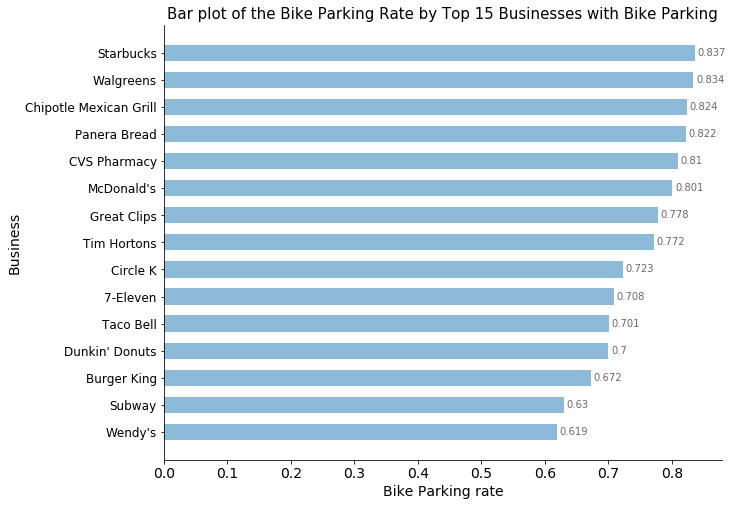

In [49]:
y = top_15_no_parking.index.to_list()
x = top_15_no_parking['Bike Parking Rate'].to_list()
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(y, x, align='center', alpha=0.5, height=0.6)
ax.invert_yaxis()
plt.xlabel('Bike Parking rate', fontsize=14)
plt.ylabel('Business', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.004, i.get_y()+.4, \
            str(round((i.get_width()), 3)), fontsize=10, color='dimgrey')
    
plt.title('Bar plot of the Bike Parking Rate by Top 15 Businesses with Bike Parking', fontsize=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Overall, the bike parking rate of those 15 businesses are very high, and all of them exceed 60%. Starbucks have the highest bike parking rate of almost 84%. Considering the branding of starbucks, in our daily life, we notice that Starbucks are located mostly in the following two areas. The first one is inside a building, such as malls and office buildings because it wants to attract more customers who are most in need of beverages. The second area is a plaza or at the corners of streets where it can have some outdoor space open during summer. Both areas are likely to have a bike parking, and this explains why Starbucks has the highest bike parking rate.

I also want to investigate if the bike parking rate varies by states. I create a new dataframe called bike_parking_by_state that contains the parking information about the states with bike parking. Since there are a few state with less than 22 businesses, I decide to remove tnem for a more accurate result. I calculate their bike parking rate and save them in a new column called Bike Parking Rate and plot a bar chart of their bike parking rate.

In [175]:
bike_parking_by_state = bike_parking.groupby(by=['state']).size().to_frame(name='Bike Parking')
all_bike_state = business[business['state'].isin(bike_parking['state'])]
bike_parking_by_state['All Businesses'] = all_bike_state.groupby(by=['state']).size().to_list()
bike_parking_by_state = bike_parking_by_state[bike_parking_by_state['All Businesses'] > 22]
bike_parking_by_state['Bike Parking rate'] = bike_parking_by_state['Bike Parking'] / \
bike_parking_by_state['All Businesses']
bike_parking_by_state = bike_parking_by_state.sort_values(by=['Bike Parking rate'], ascending=False)
bike_parking_by_state

Bike Parking  All Businesses  Bike Parking rate
state                                                 
WI             2276            5154           0.441599
ON            13797           33412           0.412935
QC             3763            9219           0.408179
AB             2894            8012           0.361208
PA             3879           11216           0.345845
NC             4960           14720           0.336957
OH             4827           14697           0.328434
IL              634            1932           0.328157
AZ            18098           56686           0.319268
NV            10851           36312           0.298827
SC              334            1162           0.287435

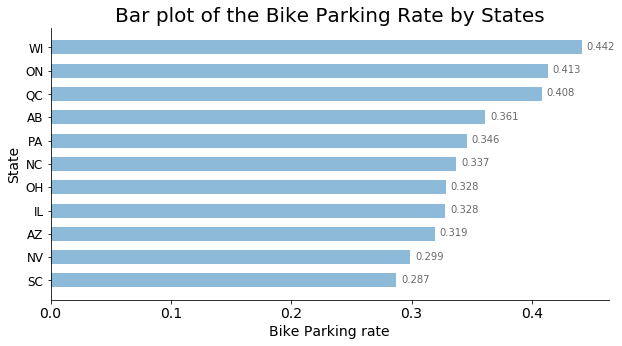

In [195]:
y = bike_parking_by_state.index.to_list()
x = bike_parking_by_state['Bike Parking rate'].to_list()
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(y, x, align='center', alpha=0.5, height=0.6)
ax.invert_yaxis()
plt.xlabel('Bike Parking rate', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.004, i.get_y()+.4, \
            str(round((i.get_width()), 3)), fontsize=10, color='dimgrey')
    
plt.title('Bar plot of the Bike Parking Rate by States', fontsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

As shown in the graph, Wisconsin has the highest bike parking rate of 44.2% and South Carolina has the lowest bike parking rate of 28.7%. I think this is possibly due to the lack of public transit in Wisconsin. I find an article online saying that Wisconsin's public transportation systems claims inadequate funding has prevented many communities from expanding service. The link is here: https://www.wpr.org/new-report-says-stagnant-funding-public-transit-has-limited-wisconsins-transportation-options. I think this might explain why the bike parking rate in Wisconsin is so high compared to the other states. The lack of public transit forces more people to use bikes to get around the area.



### 4. An article recently claimed that having more yelp reviews lead to a higher rating, and hence increased sales. Do the data support this claim?

I notice that in the original dataset, there is a variable called review_count recording the number of reviews for each business. I decide to remove the businesses with review_count less than the 10th percentile and greater than the 90th percentile. This will make the pattern more clear. I decide to plot multiple box plots of review counts by stars to see if there exists any relationship between review counts and rating.

In [55]:
# Removing outliers
q1 = business['review_count'].quantile(0.1)
q3 = business['review_count'].quantile(0.9)


review_stars = business[~((business['review_count'] < q1) \
         |(business['review_count'] > q3))].reset_index(drop=True)

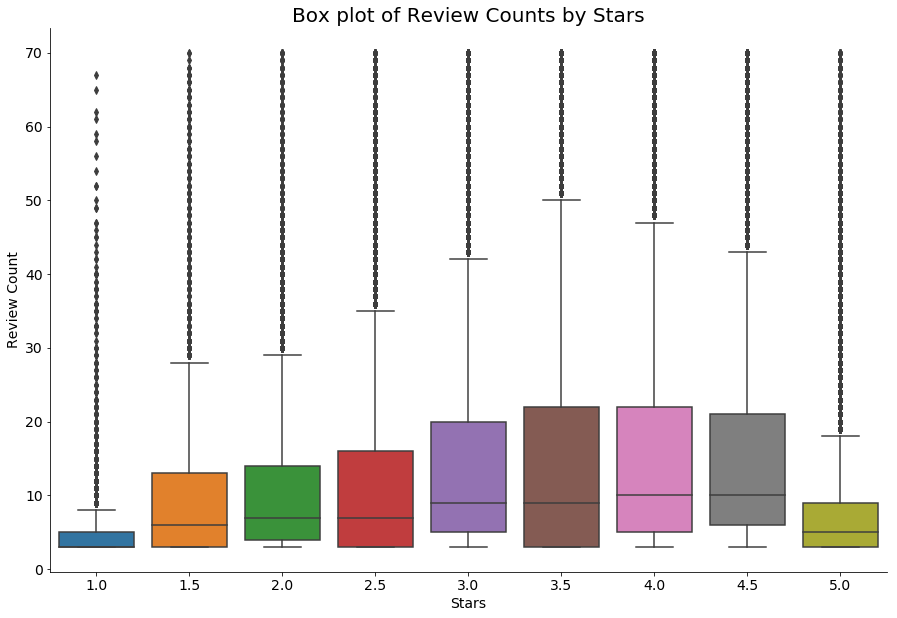

In [62]:
plt.figure(figsize=(15,10))
sns.boxplot(x = 'stars' , y = 'review_count', data = review_stars)
plt.xlabel('Stars', fontsize=14)
plt.ylabel('Review Count', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Box plot of Review Counts by Stars', fontsize=20)
sns.despine()
plt.show()

The median of the review count increases as rating increases, and is highest at 4 stars and 4.5 stars. At 5 stars, the review count median decreases to around 5 reviews. I think this is because we remove the businesses with a large number of reviews. Overall, the review count increases as rating increases, indicating that there might be a positive relationship between review count and ratings. However, we don't know if there is a causal relationship, and which factor is the cause.

## GTA

According to the Wikipedia of Greater Toronto Arae (link: https://en.wikipedia.org/wiki/Greater_Toronto_Area), the postal codes of GTA starts with L or M. By such definition, I create a new dataframe called gta by extracting businesses with postal codes starting with L or M

In [63]:
gta = business[(business['postal_code'].str[0] == 'M')|(business['postal_code'].str[0] == 'L')]
gta

attributes.Smoking attributes.DriveThru  \
1                     NaN                  NaN   
5                     NaN                  NaN   
15                    NaN                  NaN   
19                    NaN                  NaN   
26                    NaN                  NaN   
...                   ...                  ...   
192585                NaN                  NaN   
192587                NaN                  NaN   
192592                NaN                  NaN   
192595                NaN                  NaN   
192605                NaN                  NaN   

       attributes.RestaurantsCounterService attributes.RestaurantsTakeOut  \
1                                       NaN                          True   
5                                       NaN                           NaN   
15                                      NaN                           NaN   
19                                      NaN                           NaN   
26                                      NaN                          True   
...                                     ...                           ...   
192585                                  NaN                          True   
192587                                  NaN                          True   
192592                                  NaN                           NaN   
192595                                  NaN                          True   
192605                                  NaN                           NaN   

       attributes.WiFi attributes.RestaurantsAttire attributes.GoodForKids  \
1                u'no'                    u'casual'                   True   
5                  NaN                          NaN                    NaN   
15                 NaN                          NaN                    NaN   
19                 NaN                          NaN                  False   
26                 NaN                          NaN                    NaN   
...                ...                          ...                    ...   
192585          'free'                    u'casual'                   True   
192587         u'free'                    u'casual'                   True   
192592             NaN                          NaN                    NaN   
192595             NaN                    u'casual'                    NaN   
192605             NaN                          NaN                    NaN   

       attributes.Music attributes.CoatCheck hours.Saturday  ...  \
1                   NaN                  NaN        9:0-1:0  ...   
5                   NaN                  NaN      10:0-16:0  ...   
15                  NaN                  NaN    15:30-17:30  ...   
19                  NaN                  NaN       8:0-18:0  ...   
26                  NaN                  NaN       9:0-20:0  ...   
...                 ...                  ...            ...  ...   
192585              NaN                  NaN     12:0-23:45  ...   
192587              NaN                  NaN      12:0-23:0  ...   
192592              NaN                  NaN      10:0-19:0  ...   
192595              NaN                  NaN     11:0-22:30  ...   
192605              NaN                  NaN            NaN  ...   

                                               categories  \
1       Specialty Food, Restaurants, Dim Sum, Imported...   
5       Shipping Centers, Couriers & Delivery Services...   
15               Fitness & Instruction, Active Life, Yoga   
19      Trainers, Health & Medical, Active Life, Physi...   
26                                         Bakeries, Food   
...                                                   ...   
192585                                Restaurants, Indian   
192587                                  Restaurants, Thai   
192592                         Nail Salons, Beauty & Spas   
192595              Restaurants, Soup, Chinese, Caribbean   
192605               Books, Mags, Music & Video, Shoppin

### 1. What are the most frequent business categories? How do they compare against the trends listed in Part 2?

Similar to Part 1, we notice that out of these most popular categories, some of them are counted twice due to the order of the composition of the categories. As I do in Part 1, I am only going to extract the top 50 categories and rename them by using the same get_correct_categories function.

In [64]:
categories_50_gta = gta['categories'].value_counts().head(50).to_frame().index.tolist()
correct_categories_gta = get_correct_categories(categories_50_gta)
correct_categories_gta

['Coffee & Tea, Food',
 'Chinese, Restaurants',
 'Hair Salons, Beauty & Spas',
 'Restaurants, Pizza',
 'Nail Salons, Beauty & Spas',
 'Food, Grocery',
 'Restaurants, Italian',
 'Bakeries, Food',
 'Indian, Restaurants',
 'Japanese, Restaurants',
 'Thai, Restaurants',
 'Vietnamese, Restaurants',
 'Caribbean, Restaurants',
 'Automotive, Auto Repair',
 'Restaurants, Mexican',
 'Restaurants, Korean',
 'Restaurants, Burgers',
 'nan',
 'Restaurants, Sushi Bars',
 'Car Dealers, Automotive',
 'Food, Ice Cream & Frozen Yogurt',
 'Breakfast & Brunch, Restaurants',
 'Greek, Restaurants',
 'Sandwiches, Restaurants',
 'Shopping, Drugstores',
 'Restaurants, Middle Eastern',
 'Restaurants, Sushi Bars, Japanese',
 'Pet Stores, Pets']

In [65]:
gta['categories'] = gta['categories'].astype(str)
gta['new_cat'] = gta['categories'].apply(fuzz_m, cat_list=correct_categories_gta, \
                                                               score_t=fuzz.token_sort_ratio)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



By extracting the top 20 categories and recording the number of each category, I created a new dataframe called gta_cat_count that has the information about the names, the counts and whether the category is food related or not.

In [69]:
gta['cat_count'] = gta.groupby('new_cat')['new_cat'].transform('count')
gta_cat_count = gta[['new_cat','cat_count']].drop_duplicates(subset=['new_cat'])
gta_cat_count = gta_cat_count.sort_values(by=['cat_count'], ascending=False)
gta_cat_count = gta_cat_count.head(20).reset_index(drop=True)
gta_cat_count['Food Related'] = ['yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', \
                            'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no']
gta_cat_count['Color'] = np.where(gta_cat_count['Food Related'] == 'yes', 'lightseagreen', 
                            np.where(gta_cat_count['Food Related'] == 'no', 'orange', None))
gta_cat_count

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



new_cat  cat_count Food Related          Color
0                  Coffee & Tea, Food        580          yes  lightseagreen
1                Chinese, Restaurants        543          yes  lightseagreen
2          Hair Salons, Beauty & Spas        463           no         orange
3                  Restaurants, Pizza        377          yes  lightseagreen
4          Nail Salons, Beauty & Spas        311           no         orange
5                       Food, Grocery        304          yes  lightseagreen
6                Restaurants, Italian        285          yes  lightseagreen
7   Restaurants, Sushi Bars, Japanese        268          yes  lightseagreen
8                      Bakeries, Food        250          yes  lightseagreen
9                 Indian, Restaurants        207          yes  lightseagreen
10              Japanese, Restaurants        199          yes  lightseagreen
11                  Thai, Restaurants        195          yes  lightseagreen
12            Vietnamese, Restaurants        193          yes  lightseagreen
13             Caribbean, Restaurants        175          yes  lightseagreen
14               Restaurants, Mexican        170          yes  lightseagreen
15            Automotive, Auto Repair        166           no         orange
16                Restaurants, Korean        156          yes  lightseagreen
17               Restaurants, Burgers        151          yes  lightseagreen
18            Restaurants, Sushi Bars        128          yes  lightseagreen
19            Car Dealers, Automotive        123           no         orange

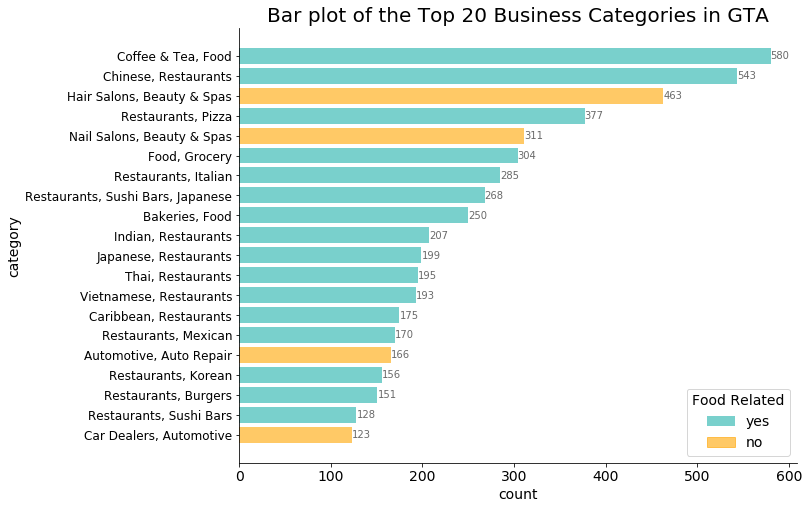

In [74]:
color = gta_cat_count['Color'].to_list()
y = gta_cat_count['new_cat'].to_list()
x = gta_cat_count['cat_count'].to_list()
labels = gta_cat_count['Food Related'].to_list()
fig, ax = plt.subplots(figsize=(10, 8))
for j in range(len(cat_count)):
    ax.barh(y[j], x[j], align='center', color=color[j], alpha=0.6, label=labels[j])
ax.invert_yaxis()
plt.xlabel('count', fontsize=14)
plt.ylabel('category', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
leg = ax.legend (['yes', 'no'], title='Food Related', fontsize=14)
leg.legendHandles[1].set_color('orange')
leg.set_title('Food Related',prop={'size':14})
plt.title('Bar plot of the Top 20 Business Categories in GTA', fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.55, \
            str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')


plt.show()


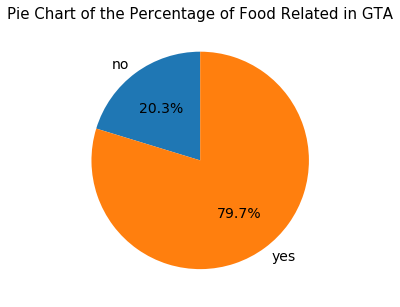

In [76]:
food = gta_cat_count.groupby(by=['Food Related']).sum()
sizes = food['cat_count'].to_list()
labels =  food.index.values.tolist()

fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Pie Chart of the Percentage of Food Related in GTA', fontsize=15)
plt.show()

As shown in the bar chart, the most popular business category is coffeem, unlike in part 1 it is pizsa restaurant. The second most popular one is Chinese restaurant and the third most popular one is nail salon. All of the three have around 500 businesses in the dataset. Out of the top 20 business categories, 16 of them are food related, unlike only half of them are food related in part 1.

As shown in the pie chart, the percentages of food-related businesses is a lot higher than the percentage of non-food-related businesses. This is very different from part 1, where their percentages are almost the same. This implies GTA people are more into foods than the average of the dataset.

We notice that the top three cuisines are Chinese food, Japanese food and Indian food. This is possibly due to the large number of Chinese, Japanese and Indian immigrants in GTA. According to the Wikipedia of the Demographics of Toronto(link: https://en.wikipedia.org/wiki/Demographics_of_Toronto), the 2016 Census indicates that 51.5% of Toronto's population is composed of visible minorities. Annually, almost half of all immigrants to Canada settle in the Greater Toronto Area. 12.6% of the population is South Asian, 11.1% of the population is Chinese, and 0.5% of the population is Japanese. This could explain why GTA has so many foreigh cusine restaurants.


<img src="files/toronto.png">

### 2. What are the top franchises in the city?

First, I apply the value_count function by the names of the businesses to get an overview of the data. I instantly notice that there are two names of Tim Hortons. Thus, I decide to write a function to get the correct list of names and rename only the top 50 franchises since we are only studying the top franchises in the city.

In [80]:
gta['name'].value_counts().head(50)

Starbucks                                 262
Tim Hortons                               233
McDonald's                                149
Shoppers Drug Mart                        101
Pizza Pizza                                96
Subway                                     88
Swiss Chalet Rotisserie & Grill            78
GoodLife Fitness                           69
Popeyes Louisiana Kitchen                  68
Second Cup                                 63
LCBO                                       56
Tim Horton's                               56
Pizza Nova                                 52
Pizza Hut                                  51
Domino's Pizza                             48
Wild Wing                                  44
Sunset Grill                               44
KFC                                        41
Wendy's                                    41
Aroma Espresso Bar                         38
Metro                                      38
Freshii                           

In [100]:
def get_correct_names(names):
    correct_names = []
    for name in names:
        if len(correct_names) == 0:
            correct_names.append(name)
        if name not in correct_names:
            max_score = 0
            for correct in correct_names:
                ratio = fuzz.ratio(correct, name)
                if ratio > max_score:
                    max_score = ratio
            if max_score < 95:
                correct_names.append(name)
    return correct_names

names_50 = gta['name'].value_counts().head(50).to_frame().index.tolist()
correct_names = get_correct_names(names_50)


In [82]:
gta['name'] = gta['name'].astype(str)
gta['new_name'] = gta['name'].apply(fuzz_m, cat_list=correct_names, score_t=fuzz.ratio)
gta.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



attributes.Smoking attributes.DriveThru  \
1                 NaN                  NaN   
5                 NaN                  NaN   
15                NaN                  NaN   
19                NaN                  NaN   
26                NaN                  NaN   

   attributes.RestaurantsCounterService attributes.RestaurantsTakeOut  \
1                                   NaN                          True   
5                                   NaN                           NaN   
15                                  NaN                           NaN   
19                                  NaN                           NaN   
26                                  NaN                          True   

   attributes.WiFi attributes.RestaurantsAttire attributes.GoodForKids  \
1            u'no'                    u'casual'                   True   
5              NaN                          NaN                    NaN   
15             NaN                          NaN                    NaN   
19             NaN                          NaN                  False   
26             NaN                          NaN                    NaN   

   attributes.Music attributes.CoatCheck hours.Saturday  ...  \
1               NaN                  NaN        9:0-1:0  ...   
5               NaN                  NaN      10:0-16:0  ...   
15              NaN                  NaN    15:30-17:30  ...   
19              NaN                  NaN       8:0-18:0  ...   
26              NaN                  NaN       9:0-20:0  ...   

   attributes.BestNights  stars  \
1                    NaN    2.5   
5                    NaN    2.5   
15                   NaN    4.0   
19                   NaN    4.0   
26                   NaN    4.5   

                           attributes.BusinessParking attributes.Corkage  \
1   {'garage': False, 'street': False, 'validated'...                NaN   
5   {'garage': False, 'street': False, 'validated'...                NaN   
15  {'garage': False, 'street': False, 'validated'...                NaN   
19                                                NaN                NaN   
26  {'garage': False, 'street': False, 'validated'...                NaN   

   attributes.RestaurantsGoodForGroups state_count city_count  \
1                                 True       33412     3112.0   
5                                  NaN       33412     3112.0   
15                                 NaN       33412     1026.0   
19                                 NaN       33412    18906.0   
26                                 NaN       33412    18906.0   

                                              new_cat cat_count  \
1   Specialty Food, Restaurants, Dim Sum, Imported...         1   
5   Shipping Centers, Couriers & Delivery Services...         1   
15           Fitness & Instruction, Active Life, Yoga        14   
19  Trainers, Health & Medical, Active Life, Physi...         1   
26                                     Bakeries, Food       250   

                      new_name  
1   Emerald Chinese Restaurant  
5                The UPS Store  
15           Hot Yoga Wellness  
19          Totum Life Science  
26               Bakery Gateau  

[5 rows x 65 columns]

In [83]:
gta['new_name'].value_counts().head(15)

Tim Hortons                        296
Starbucks                          262
McDonald's                         162
Shoppers Drug Mart                 105
Pizza Pizza                         96
Subway                              88
Swiss Chalet Rotisserie & Grill     78
GoodLife Fitness                    70
Popeyes Louisiana Kitchen           69
Second Cup                          63
LCBO                                58
Pizza Nova                          52
Pizza Hut                           51
Domino's Pizza                      50
Wild Wing                           47
Name: new_name, dtype: int64

After correcting the names of the businesses, I extract the top 15 businesses and create a variable called count to record the number of each franchises. I also create a variable called Canadian Brand to record the number of each franchise.

In [96]:
gta_top_15 = gta.groupby(['new_name']).size().to_frame(name='count').sort_values(by=['count'], ascending=False)\
.head(15)
gta_top_15['Canadian Brand'] = ['yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', \
                                  'no', 'no', 'yes']
gta_top_15

count Canadian Brand
new_name                                             
Tim Hortons                        296            yes
Starbucks                          262             no
McDonald's                         162             no
Shoppers Drug Mart                 105            yes
Pizza Pizza                         96            yes
Subway                              88             no
Swiss Chalet Rotisserie & Grill     78            yes
GoodLife Fitness                    70            yes
Popeyes Louisiana Kitchen           69             no
Second Cup                          63            yes
LCBO                                58            yes
Pizza Nova                          52            yes
Pizza Hut                           51             no
Domino's Pizza                      50             no
Wild Wing                           47            yes

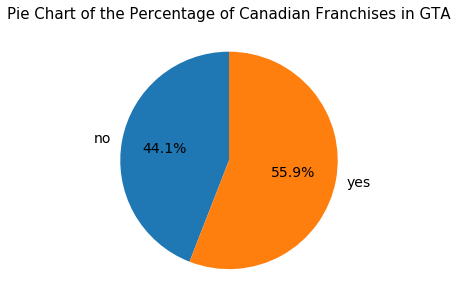

In [99]:
canada = gta_top_15.groupby(by=['Canadian Brand']).sum()
sizes = canada['count'].to_list()
labels =  canada.index.values.tolist()

fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Pie Chart of the Percentage of Canadian Franchises in GTA', fontsize=15)
plt.show()

By plotting a pie char, 55.9% of the businesses are Canadian franchises and 44.1% of the businesses are non-Canadian franchises. Out of the 15 franchises, 9 of them are Canadian franchises. This makes sense because in GTA, where Canadian people are highly crowded, people tend to support their own nation brands. By looking at of the categories these franchises, Americans definitely have their own brands for the same category. The categories are very simple, and most of them are foods.

Out of all the non-Canadian brands, Starbucks and McDonald's have the most number of businesses in GTA. This is not surprising because both of them are large transnational corporations and their businesses are all over the world. Geographically, Canada and the US are very close to each other and thus we share a lot same taste. This explains why Starbucks and McDonald's are also popular in GTA.

### 3. Does business location play an important role in reviews?

First, according to Canada Post, the postal codes of the rural area in Canada has 0 as the second digit. Thus, we can differentiate the urban and rural area by their postal codes. I will study if the rating differs between the two areas. 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



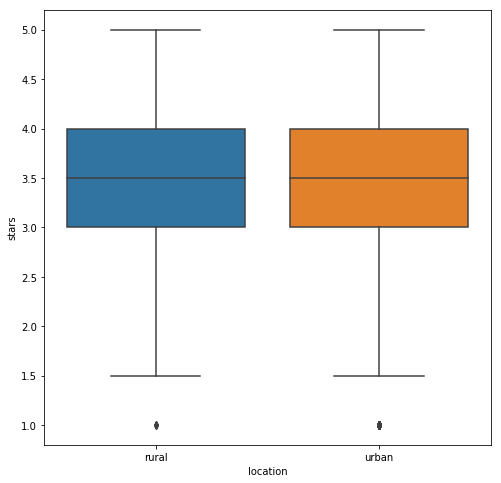

In [106]:
rural = gta[gta['postal_code'].str[1] == '0']
rural['location'] = 'rural'
urban = gta[gta['postal_code'].str[1] != '0']
urban['location'] = 'urban'
rural_urban = pd.concat([rural, urban])
plt.figure(figsize=(8,8))
sns.boxplot(x='location', y = 'stars', data = rural_urban)


Surprisingly, the distrubution of ratings in rural area and in urban areas is almost exactly the same, except for that urban area has more outliers at 1 star. Both of them have the median of 3.5 stars, the Q1 of 1.5 stars, and the Q3 of 4.0 stars.

This result may not be very accurate. First, the definition of rural and urban areas is very ambigious, and it is not up to date. Some locations are marked as rural, but with the rapid development, have a lot of population and constructions nowadays. Also, the ratings are actually discrete values, and the distribution of discrete values may not be very accurate.

### 4.  Is it true that for every Tim Hortons in the GTA there is a Starbucks nearby? Calculate distances between establishments of the two groups and assess distance patterns. Plot the two types of establishments on a map.

First, I create three dataframes each containing all the Starbucks, Tim Hortons and both coffee shops.

In [110]:
tim_starbucks = gta[(gta['new_name'] == 'Tim Hortons') | (gta['new_name'] == 'Starbucks')]
tim_starbucks

attributes.Smoking attributes.DriveThru  \
425                   NaN                  NaN   
506                   NaN                  NaN   
2300                  NaN                  NaN   
2307                  NaN                  NaN   
2595                  NaN                  NaN   
...                   ...                  ...   
190342                NaN                  NaN   
190901                NaN                  NaN   
191236                NaN                  NaN   
192216                NaN                  NaN   
192554                NaN                  NaN   

       attributes.RestaurantsCounterService attributes.RestaurantsTakeOut  \
425                                     NaN                          True   
506                                     NaN                           NaN   
2300                                    NaN                          True   
2307                                    NaN                          True   
2595                                    NaN                          True   
...                                     ...                           ...   
190342                                  NaN                          True   
190901                                  NaN                          True   
191236                                  NaN                          True   
192216                                  NaN                          True   
192554                                  NaN                          True   

       attributes.WiFi attributes.RestaurantsAttire attributes.GoodForKids  \
425             'free'                     'casual'                   True   
506                NaN                          NaN                    NaN   
2300            'free'                          NaN                    NaN   
2307            'free'                     'casual'                   True   
2595            'free'                          NaN                    NaN   
...                ...                          ...                    ...   
190342          'free'                          NaN                    NaN   
190901          'free'                     'casual'                  False   
191236         u'free'                          NaN                    NaN   
192216          'free'                          NaN                   True   
192554          'free'                          NaN                    NaN   

       attributes.Music attributes.CoatCheck hours.Saturday  ...  \
425                 NaN                  NaN       7:0-23:0  ...   
506                 NaN                  NaN            NaN  ...   
2300                NaN                  NaN            NaN  ...   
2307                NaN                  NaN      5:30-23:0  ...   
2595                NaN                  NaN            NaN  ...   
...                 ...                  ...            ...  ...   
190342              NaN                  NaN            NaN  ...   
190901              NaN                  NaN            NaN  ...   
191236              NaN                  NaN       7:0-23:0  ...   
192216              NaN                  NaN            NaN  ...   
192554              NaN                  NaN            NaN  ...   

       attributes.BestNights  stars  \
425                      NaN    4.5   
506                      NaN    1.5   
2300                     NaN    3.0   
2307                     NaN    4.0   
2595                     NaN    4.0   
...                      ...    ...   
190342                   NaN    3.0   
190901                   NaN    1.0   
191236                   NaN    3.5   
192216                   NaN    2.0   
192554                   NaN    3.5   

                               attributes.BusinessParking attributes.Corkage  \
425     {'garage': False, 'street': False, 'validated'...                NaN   
506                                                   NaN                NaN   
2300    {'garage':

In [111]:
starbucks = gta[(gta['new_name'] == 'Starbucks')]
starbucks

attributes.Smoking attributes.DriveThru  \
425                   NaN                  NaN   
2300                  NaN                  NaN   
2307                  NaN                  NaN   
2595                  NaN                  NaN   
3834                  NaN                  NaN   
...                   ...                  ...   
188171                NaN                  NaN   
189182                NaN                  NaN   
189684                NaN                  NaN   
191236                NaN                  NaN   
192554                NaN                  NaN   

       attributes.RestaurantsCounterService attributes.RestaurantsTakeOut  \
425                                     NaN                          True   
2300                                    NaN                          True   
2307                                    NaN                          True   
2595                                    NaN                          True   
3834                                    NaN                          True   
...                                     ...                           ...   
188171                                  NaN                          True   
189182                                  NaN                          True   
189684                                  NaN                          True   
191236                                  NaN                          True   
192554                                  NaN                          True   

       attributes.WiFi attributes.RestaurantsAttire attributes.GoodForKids  \
425             'free'                     'casual'                   True   
2300            'free'                          NaN                    NaN   
2307            'free'                     'casual'                   True   
2595            'free'                          NaN                    NaN   
3834               NaN                          NaN                    NaN   
...                ...                          ...                    ...   
188171         u'free'                          NaN                    NaN   
189182          'free'                          NaN                    NaN   
189684          'free'                          NaN                    NaN   
191236         u'free'                          NaN                    NaN   
192554          'free'                          NaN                    NaN   

       attributes.Music attributes.CoatCheck hours.Saturday  ...  \
425                 NaN                  NaN       7:0-23:0  ...   
2300                NaN                  NaN            NaN  ...   
2307                NaN                  NaN      5:30-23:0  ...   
2595                NaN                  NaN            NaN  ...   
3834                NaN                  NaN            NaN  ...   
...                 ...                  ...            ...  ...   
188171              NaN                  NaN            NaN  ...   
189182              NaN                  NaN       3:0-23:0  ...   
189684              NaN                  NaN       7:0-22:0  ...   
191236              NaN                  NaN       7:0-23:0  ...   
192554              NaN                  NaN            NaN  ...   

       attributes.BestNights  stars  \
425                      NaN    4.5   
2300                     NaN    3.0   
2307                     NaN    4.0   
2595                     NaN    4.0   
3834                     NaN    2.5   
...                      ...    ...   
188171                   NaN    3.5   
189182                   NaN    2.0   
189684                   NaN    4.0   
191236                   NaN    3.5   
192554                   NaN    3.5   

                               attributes.BusinessParking attributes.Corkage  \
425     {'garage': False, 'street': False, 'validated'...                NaN   
2300    {'garage': False, 'street': False, 'validated'...                NaN   
2307              

In [112]:
tims = gta[(gta['new_name'] == 'Tim Hortons')]
tims

attributes.Smoking attributes.DriveThru  \
506                   NaN                  NaN   
3550                  NaN                  NaN   
4839                  NaN                  NaN   
5816                  NaN                  NaN   
6162                  NaN                  NaN   
...                   ...                  ...   
189078                NaN                  NaN   
190074                NaN                  NaN   
190342                NaN                  NaN   
190901                NaN                  NaN   
192216                NaN                  NaN   

       attributes.RestaurantsCounterService attributes.RestaurantsTakeOut  \
506                                     NaN                           NaN   
3550                                    NaN                          True   
4839                                    NaN                          True   
5816                                    NaN                          True   
6162                                    NaN                          True   
...                                     ...                           ...   
189078                                  NaN                          True   
190074                                  NaN                          True   
190342                                  NaN                          True   
190901                                  NaN                          True   
192216                                  NaN                          True   

       attributes.WiFi attributes.RestaurantsAttire attributes.GoodForKids  \
506                NaN                          NaN                    NaN   
3550               NaN                     'casual'                   True   
4839            'free'                     'casual'                  False   
5816            'free'                          NaN                    NaN   
6162               NaN                          NaN                    NaN   
...                ...                          ...                    ...   
189078             NaN                          NaN                    NaN   
190074             NaN                    u'casual'                    NaN   
190342          'free'                          NaN                    NaN   
190901          'free'                     'casual'                  False   
192216          'free'                          NaN                   True   

       attributes.Music attributes.CoatCheck hours.Saturday  ...  \
506                 NaN                  NaN            NaN  ...   
3550                NaN                  NaN            NaN  ...   
4839                NaN                  NaN            NaN  ...   
5816                NaN                  NaN        0:0-0:0  ...   
6162                NaN                  NaN       7:0-23:0  ...   
...                 ...                  ...            ...  ...   
189078              NaN                  NaN            NaN  ...   
190074              NaN                  NaN            NaN  ...   
190342              NaN                  NaN            NaN  ...   
190901              NaN                  NaN            NaN  ...   
192216              NaN                  NaN            NaN  ...   

       attributes.BestNights  stars  \
506                      NaN    1.5   
3550                     NaN    2.0   
4839                     NaN    2.5   
5816                     NaN    3.0   
6162                     NaN    2.0   
...                      ...    ...   
189078                   NaN    2.0   
190074                   NaN    4.0   
190342                   NaN    3.0   
190901                   NaN    1.0   
192216                   NaN    2.0   

                               attributes.BusinessParking attributes.Corkage  \
506                                                   NaN                NaN   
3550    {'garage': False, 'street': False, 'validated'...                NaN   
4839    {'garage':

To find the shortest distance of Starbucks and Tim Hortons, I write a function that return the shortest distance between a geolocation and all the locations in a dataframe. I then calculate the shortest distance of Starbucks and Tim Hortons and record them in dataframe new_tims_starbucks.

In [113]:
from geopy import distance

def get_shortest_distance(lat, long, df):
    distances=[]
    for index, row in df.iterrows():
        distances.append(distance.distance((lat, long), (row['latitude'], row['longitude'])).km)
    return min(distances)



In [114]:
distances = []
for index, row in starbucks.iterrows():
    distances.append(get_shortest_distance(row['latitude'], row['longitude'], tims))
starbucks['shortest distance'] = distances

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
distances1 = []
for index, row in tims.iterrows():
    distances1.append(get_shortest_distance(row['latitude'], row['longitude'], starbucks))
tims['shortest distance'] = distances1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
new_tims_starbucks = pd.concat([tims, starbucks])
new_tims_starbucks = new_tims_starbucks.reset_index(drop=True)
new_tims_starbucks

attributes.Smoking attributes.DriveThru  \
0                  NaN                  NaN   
1                  NaN                  NaN   
2                  NaN                  NaN   
3                  NaN                  NaN   
4                  NaN                  NaN   
..                 ...                  ...   
553                NaN                  NaN   
554                NaN                  NaN   
555                NaN                  NaN   
556                NaN                  NaN   
557                NaN                  NaN   

    attributes.RestaurantsCounterService attributes.RestaurantsTakeOut  \
0                                    NaN                           NaN   
1                                    NaN                          True   
2                                    NaN                          True   
3                                    NaN                          True   
4                                    NaN                          True   
..                                   ...                           ...   
553                                  NaN                          True   
554                                  NaN                          True   
555                                  NaN                          True   
556                                  NaN                          True   
557                                  NaN                          True   

    attributes.WiFi attributes.RestaurantsAttire attributes.GoodForKids  \
0               NaN                          NaN                    NaN   
1               NaN                     'casual'                   True   
2            'free'                     'casual'                  False   
3            'free'                          NaN                    NaN   
4               NaN                          NaN                    NaN   
..              ...                          ...                    ...   
553         u'free'                          NaN                    NaN   
554          'free'                          NaN                    NaN   
555          'free'                          NaN                    NaN   
556         u'free'                          NaN                    NaN   
557          'free'                          NaN                    NaN   

    attributes.Music attributes.CoatCheck hours.Saturday  ... stars  \
0                NaN                  NaN            NaN  ...   1.5   
1                NaN                  NaN            NaN  ...   2.0   
2                NaN                  NaN            NaN  ...   2.5   
3                NaN                  NaN        0:0-0:0  ...   3.0   
4                NaN                  NaN       7:0-23:0  ...   2.0   
..               ...                  ...            ...  ...   ...   
553              NaN                  NaN            NaN  ...   3.5   
554              NaN                  NaN       3:0-23:0  ...   2.0   
555              NaN                  NaN       7:0-22:0  ...   4.0   
556              NaN                  NaN       7:0-23:0  ...   3.5   
557              NaN                  NaN            NaN  ...   3.5   

                            attributes.BusinessParking attributes.Corkage  \
0                                                  NaN                NaN   
1    {'garage': False, 'street': False, 'validated'...                NaN   
2    {'garage': False, 'street': False, 'validated'...                NaN   
3    {'garage': False, 'street': False, 'validated'...                NaN   
4                                                  NaN                NaN   
..                                                 ...                ...   
553  {'garage': False, 'street': False, 'validated'...                NaN   
554  {'garage': True, 'street': False, 'validated':...                NaN   
555  {'garage': False, 'street': False, 'validated'...                NaN   
556  {'garage': False, 'st

I now classify them into four groups by their shortest distance to a nearby store. The groups are 0-0.5 km, 0.5-1 km, 1-2 km, and more than 2 km.

Before I make a conclusion on if it's true that for every Tim Hortons in the GTA there is a Starbucks nearby, I need to clarify the term "nearby". When I look up the dictionary, "nearby" means "close at hand; not far away". The average human walking speed at crosswalks is about 5.0 kilometres per hour (km/h). In this context, I consider two stores are "nearby" when the distance between them is less than 1km, which means that it takes about 12 minutes of walking. 

In [117]:
new_tims_starbucks.loc[(new_tims_starbucks['shortest distance'] >= 0) & (new_tims_starbucks['shortest distance'] \
                                                                           < 0.5), 'distance group'] = '0-0.5 km'
new_tims_starbucks.loc[(new_tims_starbucks['shortest distance'] >= 0.5) & (new_tims_starbucks['shortest distance'] \
                                                                           < 1), 'distance group'] = '0.5-1 km'
new_tims_starbucks.loc[(new_tims_starbucks['shortest distance'] >= 1) & (new_tims_starbucks['shortest distance'] \
                                                                           < 2), 'distance group'] = '1-2 km'
new_tims_starbucks.loc[(new_tims_starbucks['shortest distance'] >= 2), 'distance group'] = 'more than 2 km'

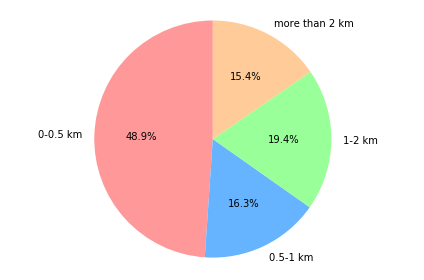

In [120]:
sums = new_tims_starbucks.groupby(['distance group']).size()
# Pie chart
labels = ['0-0.5 km', '0.5-1 km', '1-2 km', 'more than 2 km']

#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sums, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()


As shown in the pie chart, 48.9% of Starbucks and Tim Hortons are within 0.5km to each other, and 16.3% of them are between 0.5km to 1km away from each other. Thus, in this dataset, 65.2% of them are considered nearby to each other. Only, 15.4% of them are more than 2km away from each other, which means that people have to use other transportation tools to get there. Since the percentage of "nearby" is greater than 50%, we can conclude that it's true that for most Tim Hortons in the GTA there is a Starbucks nearby, but not all of them.

Now, I will plot all the Starbucks and Tim Hortons on the map. I get the image of the map from OpenStreetMap, https://www.openstreetmap.org/export#map=10/43.7557/-79.4051.

In [122]:
BBox = ((tim_starbucks.longitude.min(), tim_starbucks.longitude.max(),      
         tim_starbucks.latitude.min(), tim_starbucks.latitude.max()))
BBox

(-79.90418538899999, -78.9074536, 43.4545373496, 44.0566008421)

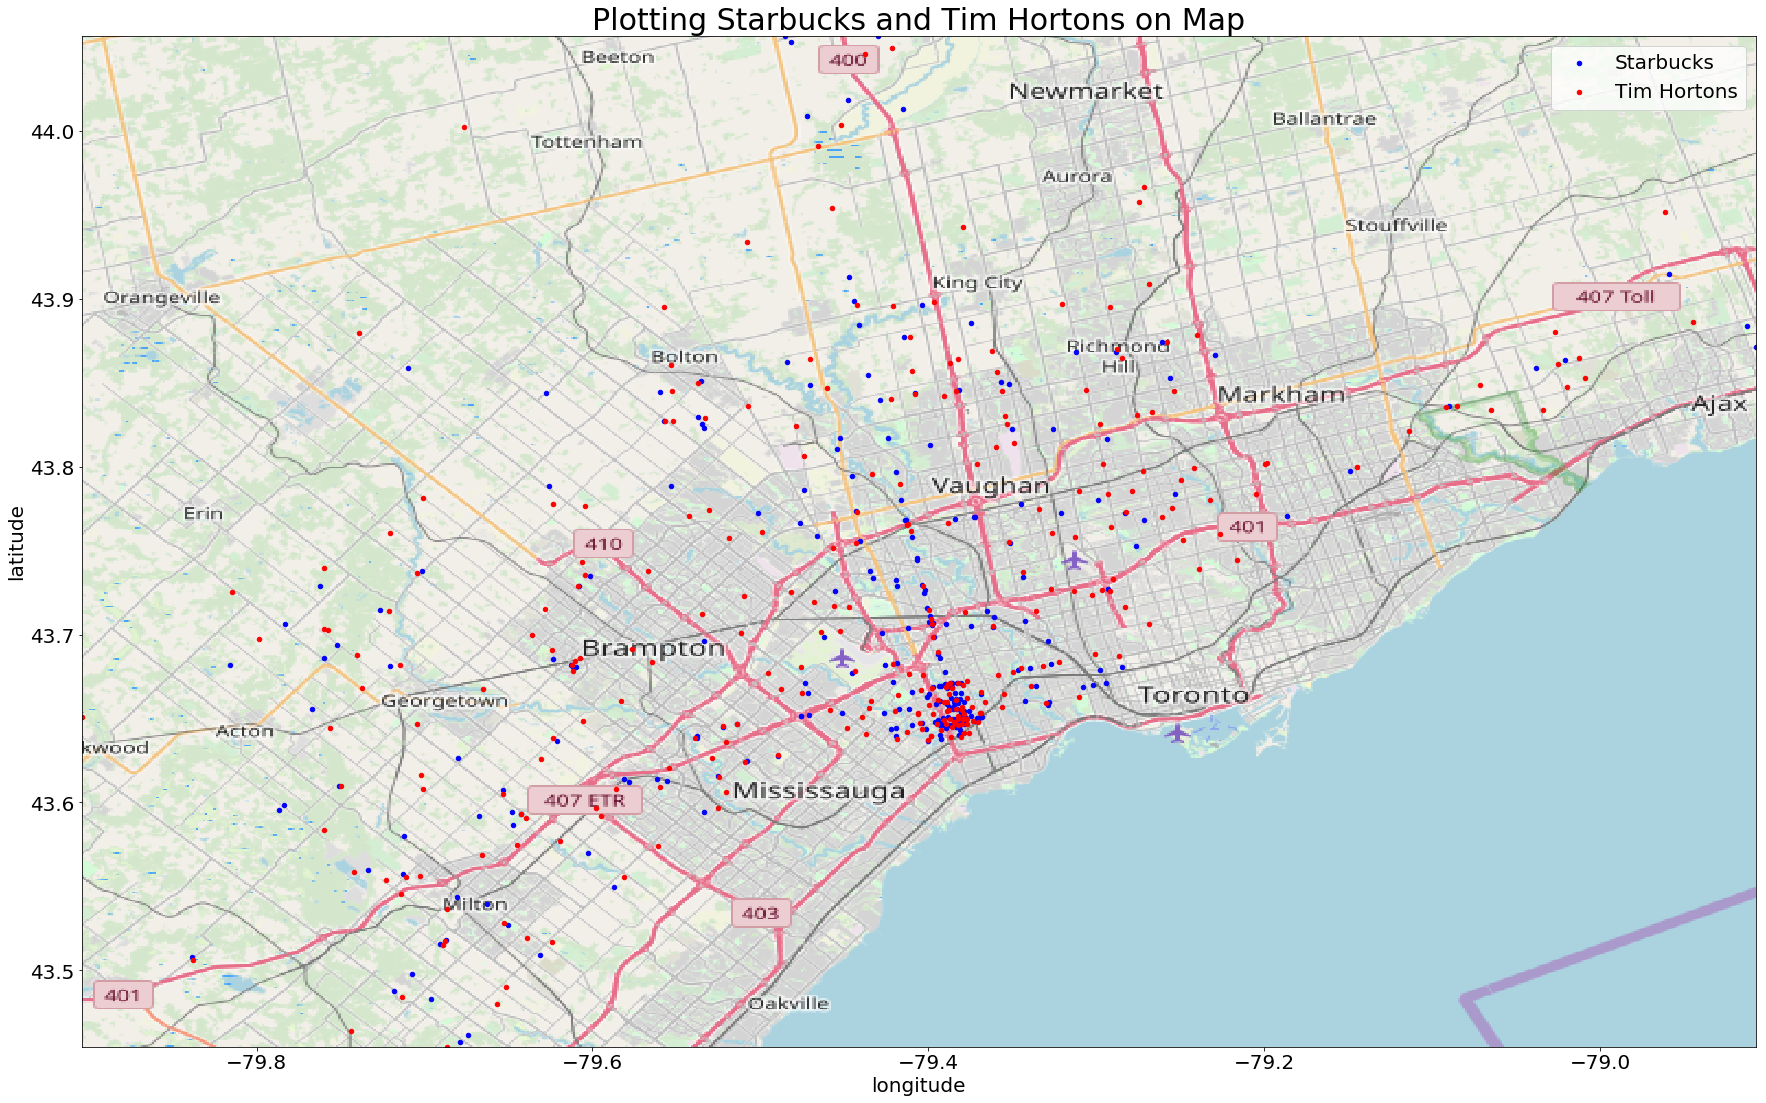

In [138]:
gta_map = plt.imread('map.png')
fig, ax = plt.subplots(figsize = (30,20))
ax.scatter(starbucks.longitude, starbucks.latitude, zorder=2, alpha=1, c='b', s=20)
ax.scatter(tims.longitude, tims.latitude, zorder=2, alpha= 1, c='r', s=20)
ax.set_title('Plotting Starbucks and Tim Hortons on Map', fontsize=30)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.legend(['Starbucks', 'Tim Hortons'], fontsize=20)
plt.xlabel('longitude', fontsize=20)
plt.ylabel('latitude', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.imshow(gta_map, zorder=1, extent = BBox, aspect= 'equal')


As shown in the map, most of the Starbucks and Tim Hortons are located in downtown Toronto, especially in the financial district where coffee is almost a routine for people working there. Even though both of them are all over GTA, we can tell from the map that the larger the city is, the more Starbucks and Tim Hortons there are.

Toronto's Central Business District is roughly bounded by Yonge St., Front St., University Ave. and Queen St. The headquarters of most major Canadian corporations are located there.


In [140]:
toronto_tim_starbucks = tim_starbucks[tim_starbucks['city'] == 'Toronto']
toronto_starbucks = starbucks[starbucks['city'] == 'Toronto']
toronto_tims = tims[tims['city'] == 'Toronto']


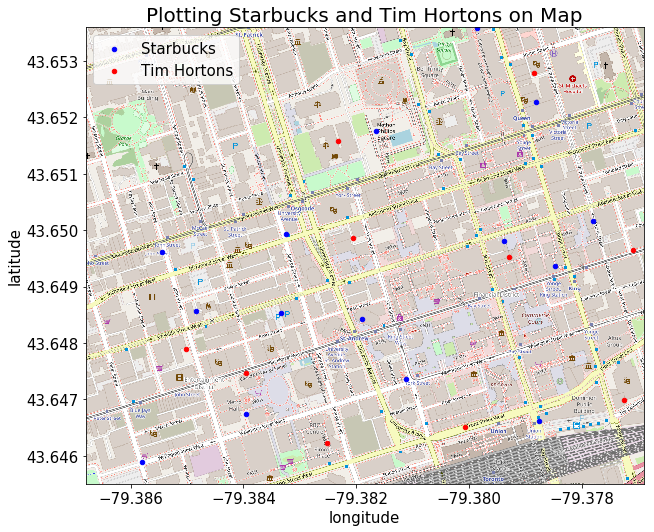

In [147]:
bound = (-79.3868, -79.3769, 43.6455, 43.6536)
cbd_map = plt.imread('cbd_map.png')
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(toronto_starbucks.longitude, toronto_starbucks.latitude, zorder=2, alpha=1, c='b', s=20)
ax.scatter(toronto_tims.longitude, toronto_tims.latitude, zorder=2, alpha= 1, c='r', s=20)
ax.set_title('Plotting Starbucks and Tim Hortons on Map', fontsize=20)
ax.set_xlim(bound[0],bound[1])
ax.set_ylim(bound[2],bound[3])
ax.legend(['Starbucks', 'Tim Hortons'], fontsize=15)
plt.xlabel('longitude', fontsize=15)
plt.ylabel('latitude', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.imshow(cbd_map, zorder=1, extent = bound, aspect= 'equal')

## Reviews

### 1. Is there a small group of users responsible for most reviews?

In [37]:
json = 'yelp_dataset/review.json'
csv = 'review.csv'
column_names = get_superset_of_column_names_from_file('yelp_dataset/review.json')
read_and_write_file(json, csv, column_names)

In [26]:
review = pd.read_csv("review.csv")
review.head()

stars  useful             business_id               review_id  funny  cool  \
0    1.0       6  ujmEBvifdJM6h6RLv4wQIg  Q1sbwvVQXV2734tPgoKj4Q      1     0   
1    5.0       0  NZnhc2sEQy3RmzKTZnqtwQ  GJXCdrto3ASJOqKeVWPi6Q      0     0   
2    5.0       3  WTqjgwHlXbSFevF32_DJVw  2TzJjDVDEuAW6MR5Vuc1ug      0     0   
3    5.0       0  ikCg8xy5JIg_NGPx-MSIDA  yi0R0Ugj_xUx_Nek0-_Qig      0     0   
4    1.0       7  b1b1eb3uo-w561D0ZfCEiQ  11a8sVPMUFtaC7_ABRkmtw      0     0   

                  date                                               text  \
0  2013-05-07 04:34:36  Total bill for this horrible service? Over $8G...   
1  2017-01-14 21:30:33  I *adore* Travis at the Hard Rock's new Kelly ...   
2  2016-11-09 20:09:03  I have to say that this office really has it t...   
3  2018-01-09 20:56:38  Went in for a lunch. Steak sandwich was delici...   
4  2018-01-30 23:07:38  Today was my second out of three sessions I ha...   

                  user_id  
0  hG7b0MtEbXx5QzbzE6C_VA  
1  yXQM5uF2jS6es16SJzNHfg  
2  n6-Gk65cPZL6Uz8qRm3NYw  
3  dacAIZ6fTM6mqwW5uxkskg  
4  ssoyf2_x0EQMed6fgHeMyQ

I extract all the reviews in GTA, and count the number of reviews of each user, saved as count in gta_review.

In [27]:
gta_review = review[review['business_id'].isin(gta['business_id'])]

In [28]:
gta_review['count'] = gta_review.groupby('user_id')['user_id'].transform('count')
review_count = gta_review[['user_id','count']].drop_duplicates(subset=['user_id'])
review_count.describe()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count
count  148297.000000
mean        5.279878
std        22.163604
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max      3940.000000

Overall, most of the users only post 1 review. Tha maximum review number is 148297, which must be identified as an outlier or a fake reviewer. Averagely, each user post around 5 reviews. More than 50% of the reviewers in the official dataset provide only a single review. 75% of the users post 3 or less than 3 reviews.

This shows that Yelp users are not very engaged in reviewing the businesses. Instead, Yelp is used more as a tool to gather information about the businesses. As the survey in the class, only 1 out of 25 students have posted something on Yelp, so the result of the summary table above is not so surprising.

In [29]:
review_count = review_count.sort_values(by=['count'], ascending=False)
percentile_90 = review_count['count'].quantile(0.90)
review_count[review_count['count'] > percentile_90]
percentage_90 = review_count[review_count['count'] > percentile_90]['count'].sum()/len(gta_review)
percentage_90

0.6294320489405995

In [30]:
percentile_95 = review_count['count'].quantile(0.95)
review_count[review_count['count'] > percentile_95]
percentage_95 = review_count[review_count['count'] > percentile_95]['count'].sum()/len(gta_review)
percentage_95

0.5174293413708987

In [31]:
percentile_99 = review_count['count'].quantile(0.99)
review_count[review_count['count'] > percentile_99]
percentage_99 = review_count[review_count['count'] > percentile_99]['count'].sum()/len(gta_review)
percentage_99

0.28831274984354843

Here, I calculate the percentage of the number of reviews od the top users and all the reviews. The top 10% users with most number of reviews are responsible for around 63% of the total reviews. The top 5% users with most number of reviews are responsible for around 52% of the total reviews. The top 1% users with most number of reviews are responsible for around 30% of the total reviews. 

This trend is not so surprising because fake reviewers are common on Yelp to increase the rating of businesses and thus attract more customers. And I will discuss this further.

### 2. Do Yelp reviewers use similar language in their reviews of GTA's Tim Horton's and Starbucks? What about for the subset of users who reviewed both establishments?

I first create dataframes to save reviews for Starbucks and Tim Hortons in GTA.

In [32]:
gta_starbucks_review = gta_review[(gta_review['business_id'].isin(starbucks['business_id']))]
gta_starbucks_review

stars  useful             business_id               review_id  funny  \
2093       2.0       0  IO2W0wnHuL7P4KgvEFWnsw  GbtXaV7veKgTNP3okROUPA      0   
5862       5.0       0  c3midFhkGjvtvsmVUDzfKw  OG4HIgyIuVIYzT79aM8MRg      0   
9535       4.0       1  uWbmDMJcuxVgryNihVx3rw  aAye1sbDRGuT49UK3Hyl1Q      1   
16211      4.0       1  RfRKUfYJq1aW-m2baBApxg  sY-iHGWlFU6Ek449fwk73A      1   
21056      1.0       0  2iYGfGTI2Bm56rUaJfpZug  9iNRUHH1m93pJFnhIj-cIw      0   
...        ...     ...                     ...                     ...    ...   
6660895    1.0       0  1-Z6tVozu4v1JHzlg8x4kA  _pn9-M6rNV24BDevIDjRiw      0   
6665602    5.0       1  yklSVLflZ02xaoylbjtRjw  N_KmlDBC6Y4q7hY_LK2xmg      0   
6675416    5.0       1  5XwfpotCAvDzPyAulk_m5A  TopvJ2Z9pK08nIJ57YCRPg      0   
6677804    2.0       2  Ibnirnlej1gHh9w3vkhNvQ  2Wbjz96om4hRIw4iQcIxRA      0   
6678008    4.0       0  40o-_QAm2UTFrugmqjGMiA  j0R982fYjxTlQ69hjY8nIw      0   

         cool                 date  \
2093        0  2012-05-28 22:29:24   
5862        0  2015-04-28 19:57:37   
9535        1  2016-01-30 06:55:15   
16211       2  2015-05-13 04:22:55   
21056       0  2016-12-04 22:04:12   
...       ...                  ...   
6660895     0  2017-06-05 15:01:49   
6665602     1  2012-01-30 18:57:04   
6675416     0  2013-08-31 03:57:27   
6677804     0  2011-12-31 03:17:47   
6678008     1  2016-05-16 21:10:36   

                                                      text  \
2093     It seems every time I come here the service is...   
5862     Good management and friendly staff make this l...   
9535     I mean should I really review another Starbuck...   
16211    My new local Starbucks! The service is great, ...   
21056    I very rarely have a negative  experience at S...   
...                                                    ...   
6660895  Came to this location this morning, my first t...   
6665602  I don't normally review Starbucks, but i'm rev...   
6675416  This location is perfect for the business dist...   
6677804  This has been my coffee spot for the past week...   
6678008  like Starbucks. Actually I love Starbucks. And...   

                        user_id  count  
2093     pRUNDiyticCO3v54x2v-8g    101  
5862     SbvlhH2MuUjUrp9WkFBrig     23  
9535     YI5sEimxyYrdeFbmsv_ssQ     10  
16211    F8i3UoHu6tSbAWJDjWkJUA      1  
21056    tSDeB-PfBtiFaHw2k2DPLw     20  
...                         ...    ...  
6660895  wHrj-I22LGCQk6WvSc9YMw      1  
6665602  HyXK2GNR9i4SWpLQGOqQYQ    292  
6675416  n7oHpl11EoEMxGKO-XxRow     63  
6677804  augJQotyLB503iq1gVJ_tg    111  
6678008  t5nWD3Ya10ntwt3iWx5Kbg    204  

[2897 rows x 10 columns]

In [33]:
gta_tims_review = gta_review[(gta_review['business_id'].isin(tims['business_id']))]
gta_tims_review

stars  useful             business_id               review_id  funny  \
3381       5.0       0  uovoaLJV99NdPRgv43sLFQ  mTZvq_y1w1x2_q6QzeGjCA      0   
6587       3.0       0  6756R6GyrhnQnxaB19kJtw  xVDjrNWii51cdDn1U84MaQ      0   
8355       1.0       1  uovoaLJV99NdPRgv43sLFQ  MjwHus6HVB6pPufdV3UzRQ      0   
8436       2.0       6  YPLJPAHy_byhlrwceIbN9Q  bAgw7lPeZdFMw3z5alm6kA      5   
9660       3.0       0  tGA6DQqySVxIs4AN9Op_aQ  ArgPaqzHtaSqMOBsvQspzA      2   
...        ...     ...                     ...                     ...    ...   
6660547    4.0       0  UHMlhyW8az79fAMQ_c6sFQ  lBHswtNNf8Htj34fSk9sqA      0   
6672128    3.0       0  slc54YlLNLVx-fRvoSqw4w  XKiBB5KeAtmF-72xHT25PQ      0   
6673995    5.0       0  NTuvt9fOpPnC2CkvVDG5_w  ljgseSUiXH7osTpAT2M3pA      0   
6674442    1.0       0  I3_WYXQXj995pvGVWATnCg  VPekYKIZ6iLjPlswtsmZRA      0   
6675127    2.0       0  G23-3ALefxIm1bs-oRLYtQ  qw35GEe6EeiIGCKmkG4xBg      0   

         cool                 date  \
3381        0  2014-10-27 01:47:49   
6587        0  2016-05-07 03:46:50   
8355        0  2017-01-02 16:02:15   
8436        5  2012-11-06 17:29:29   
9660        0  2012-03-30 00:32:41   
...       ...                  ...   
6660547     0  2014-02-22 05:29:29   
6672128     0  2017-06-04 08:26:24   
6673995     0  2013-02-23 20:04:20   
6674442     0  2018-03-14 12:46:33   
6675127     1  2010-12-28 20:25:15   

                                                      text  \
3381     AMAZING!! That's all I have to say.. my mom an...   
6587     Timmy's is the best for inexpensive coffee and...   
8355     I would give 0 stars if possible. This Tim Hor...   
8436     This place is an absolute gong show (on a Satu...   
9660     I don't know how to describe this place... ah....   
...                                                    ...   
6660547  We bought ice cap from this location at 12.30a...   
6672128  Nothing too special about this one.\n\nStopped...   
6673995  This is the first time I've ever rated a Timmi...   
6674442  The worst service and very humiliating!!they g...   
6675127  There was a huge FLY in the Donut case on the ...   

                        user_id  count  
3381     oSL39s__owii0Me8u-OS9g    100  
6587     lR2zF-gSOEaNyZVdgDA5Gg     13  
8355     9ydq1GlwsUlEACfhL5XLog     20  
8436     YRcaNlwQ6XXPFDXWtuMGdA    701  
9660     69y7eZP22sPr6fJ_fxGB9g    139  
...                         ...    ...  
6660547  mc9Cv2JSbmXn_OA9GxXWHw      7  
6672128  Jb13QyXGi0zD4ZtSTBQwpQ    262  
6673995  YBT3EKUNN4IP8m4x7sGu1g    885  
6674442  Ns8YNAJy2wNurv9RT_7yGA      5  
6675127  1ACkCe88DC97bHlTciJbNw     11  

[1824 rows x 10 columns]

I extracted all reviews of Starbucks and Tim Hortons in GTA. I also removed all the stop words from the texts of the reviews to increase efficiency when processing the data. I then calculated the sentiment scores and saved them in new columns.

In [34]:
stop_words = stopwords.words('english')
gta_starbucks_review['text_without_stopwords'] = gta_starbucks_review['text'].apply\
(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
gta_tims_review['text_without_stopwords'] = gta_tims_review['text'].apply\
(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
gta_tims_review['Positivity'] = gta_tims_review['text_without_stopwords'].apply\
(lambda Text: pd.Series(sia.polarity_scores(Text)['pos']))
gta_tims_review['Negativity'] = gta_tims_review['text_without_stopwords'].apply\
(lambda Text: pd.Series(sia.polarity_scores(Text)['neg']))
gta_tims_review['Neutrality'] = gta_tims_review['text_without_stopwords'].apply\
(lambda Text: pd.Series(sia.polarity_scores(Text)['neu']))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [36]:
gta_starbucks_review['Positivity'] = gta_starbucks_review['text_without_stopwords'].apply\
(lambda Text: pd.Series(sia.polarity_scores(Text)['pos']))
gta_starbucks_review['Negativity'] = gta_starbucks_review['text_without_stopwords'].apply\
(lambda Text: pd.Series(sia.polarity_scores(Text)['neg']))
gta_starbucks_review['Neutrality'] = gta_starbucks_review['text_without_stopwords'].apply\
(lambda Text: pd.Series(sia.polarity_scores(Text)['neu']))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

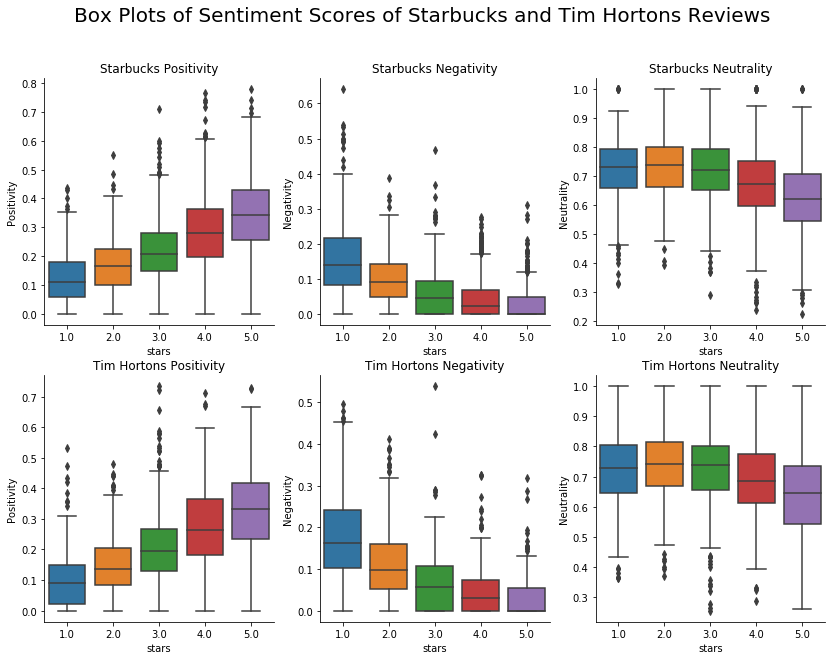

In [37]:
f, axes = plt.subplots(2, 3, figsize=(14,10))
sns.boxplot(x = 'stars' , y = 'Positivity', data = gta_starbucks_review, ax=axes[0, 0])
sns.boxplot(x = 'stars' , y = 'Negativity', data = gta_starbucks_review, ax=axes[0, 1])
sns.boxplot(x = 'stars' , y = 'Neutrality', data = gta_starbucks_review, ax=axes[0, 2])
sns.boxplot(x = 'stars' , y = 'Positivity', data = gta_tims_review, ax=axes[1, 0])
sns.boxplot(x = 'stars' , y = 'Negativity', data = gta_tims_review, ax=axes[1, 1])
sns.boxplot(x = 'stars' , y = 'Neutrality', data = gta_tims_review, ax=axes[1, 2])
axes[0,0].set_title('Starbucks Positivity', fontsize=12)
axes[0,1].set_title('Starbucks Negativity', fontsize=12)
axes[0,2].set_title('Starbucks Neutrality', fontsize=12)
axes[1,0].set_title('Tim Hortons Positivity', fontsize=12)
axes[1,1].set_title('Tim Hortons Negativity', fontsize=12)
axes[1,2].set_title('Tim Hortons Neutrality', fontsize=12)

plt.suptitle('Box Plots of Sentiment Scores of Starbucks and Tim Hortons Reviews', fontsize=20)
sns.despine()
f.savefig('sentiments.png', dpi=200)

As shown in the graph, the positive score medium increases as rating increases for both Starbucks and Tim Hortons, and the negative score medium decreases as rating increases. This makes sense because when the customers are satisfied with the businesses, they tend to use more positive language to describe the experiences, contrasting to negative reviews where customers tend to use more negative words to complain about the services. The variance in positive scores is highest at 5 stars and also increases as rating increases. This may be because when people are praising the business, they are more likely to use various languages and write longer reviews, but when people are not satisfied, their reviews tend to be short and only consist of certain positive words. A similar trend is also in the negative scores for both businesses.

The neutral score is quite different. Overall, the medium decreases as the rating increases. The variance is almost the same among all ratings, except for 5 stars. The medium is highest between 2 stars to 3 stars. This makes sense because when customers are not very satisfied with the business, they tend to list facts in the reviews to support their claims, while when people are satisfied, they tend to use more positive words to show their love.

Overall, the distribution of sentiment scores of the reviews is similar in both Starbucks and Tim Hortons. This can somehow imply that customers use similar language when reviewing both, but not completely. The sentiment score can show customers’ attitudes towards businesses. However, some limitations include that the dataset is too small and only consists of almost 5000 reviews. Also, removing the stops words may result in inaccuracy in sentiment scores.


### 3. Can we automatically detect "paid reviewers" (i.e. people who are paid to write positive reviews)?

First, I will list some characteristics of fake reviews.
1. Fake reviewers submit more reviews on average, compared to regular reviewers because their accounts are used to write reviews. More than 50% of the reviewers in the official dataset provide only a single review. 
2. Fake reviewers review more frequently than regular reviewers and the reason is similar to above. 
3. The lifetime of fake reviewer accounts is nearly twice as long as regular users because they stay active after they have created the account. 
4. The distribution between ratings of fake reviews varies most are mostly 1-star and 5-star reviews.
5. Compared to official reviews, short reviews are rather uncommon in fake reviews.
6. Fake reviews are rated more often helpful compared to official reviews.
7. Fake reviews include more positives adjectives.

Thus, I think it's helpful to use a classification tree to determine if a review is fake based on the characteristics above. However, I couldn't figure it out right now and I will comeback to it later.

## Conclusion

The results and conclusions for each question is listed above. However, I want to talk about the entire project in an overall scope and the limitations of my research.

First, I remove many rows to facilitate the data wrangling process. I believe some of them may not be very true and may cause inaccuracy in my results.

Also, I only use simple visualization to show the data, and I believe there are more statistical methods and visualizations that I can use to improve the quality of my report as I keep learning.